In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

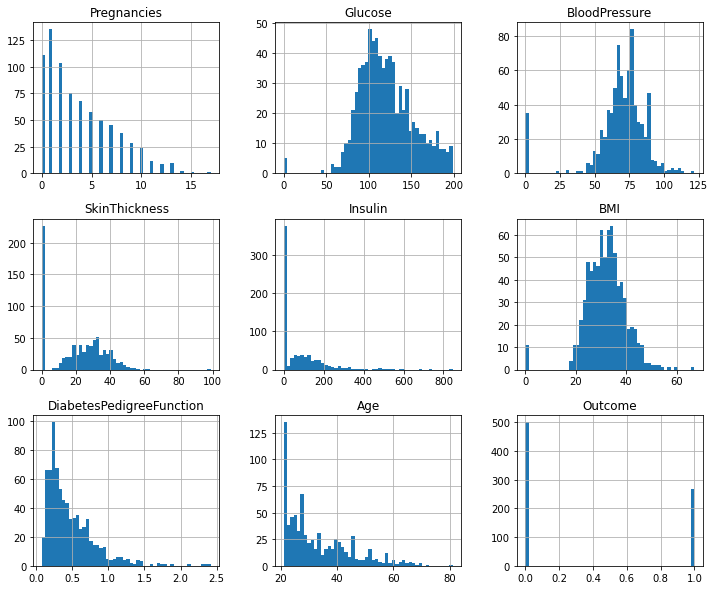

In [5]:
df.hist(figsize=(12,10),bins=50)
plt.show()

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

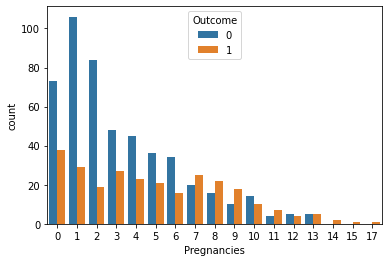

In [6]:
sns.countplot(data=df,x='Pregnancies',hue='Outcome')

In [7]:

df["Pregnancies_high"] = df['Pregnancies']>6

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

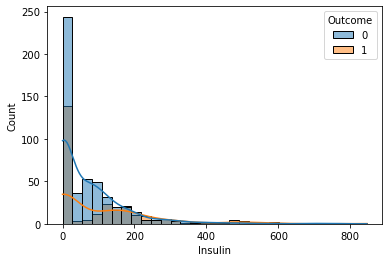

In [8]:
sns.histplot(data=df, x='Insulin', hue='Outcome', kde=True)

<AxesSubplot:xlabel='Insulin_nan', ylabel='Count'>

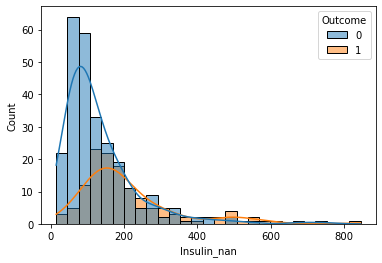

In [9]:

df['Insulin_nan'] = df['Insulin'].replace(0, np.nan)

sns.histplot(data=df, x='Insulin_nan', hue='Outcome', kde=True)

In [10]:
df['Insulin_nan'].isnull().sum()

374

In [11]:
df['Insulin_nan'].isnull().mean()

0.4869791666666667

In [12]:
in_desc = df.groupby('Outcome')['Insulin_nan'].describe()
in_desc

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [13]:
in_desc.loc[0,"50%"]

102.5

In [14]:
import random

df['Insulin_filled'] = df['Insulin_nan']
# df.loc[df['Insulin_nan'].isnull() & df['Outcome']==0, 'Insulin_filled'] = random.randrange(int(in_desc.loc[0,"50%"]), int(in_desc.loc[0,"max"]))
# df.loc[df['Insulin_nan'].isnull() & df['Outcome']==1, 'Insulin_filled'] = random.randrange(int(in_desc.loc[1,"50%"]), int(in_desc.loc[1,"max"]))
df.loc[df['Insulin_nan'].isnull() & (df['Outcome']==1), 'Insulin_filled'] = in_desc.loc[1,"50%"]
df.loc[df['Insulin_nan'].isnull() & (df['Outcome']==0), 'Insulin_filled'] = in_desc.loc[0,"50%"]

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan,Insulin_filled
0,6,148,72,35,0,33.6,0.627,50,1,False,NaN,169.5
1,1,85,66,29,0,26.6,0.351,31,0,False,NaN,102.5
2,8,183,64,0,0,23.3,0.672,32,1,True,NaN,169.5
3,1,89,66,23,94,28.1,0.167,21,0,False,94.0,94.0
4,0,137,40,35,168,43.1,2.288,33,1,False,168.0,168.0


<AxesSubplot:xlabel='Insulin_filled'>

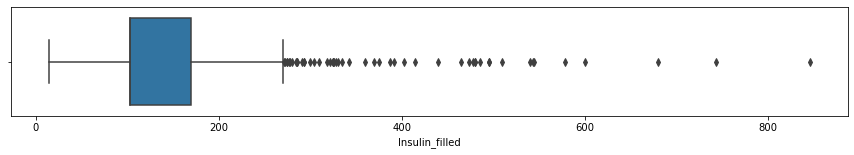

In [15]:
plt.figure(figsize=(15, 2))
sns.boxplot(x = df["Insulin_filled"])

In [16]:
df["Insulin_filled"].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_filled, dtype: float64

In [17]:
# IQR could possible as well
df.loc[df['Insulin_filled'] > 400, 'Insulin_filled'] = 400

<AxesSubplot:xlabel='Insulin_filled', ylabel='Density'>

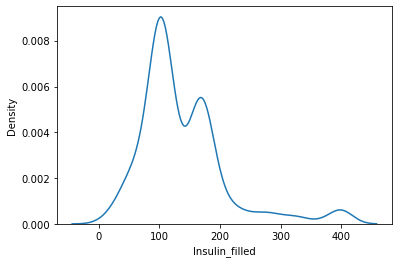

In [18]:
sns.kdeplot(df['Insulin_filled'])

In [19]:
split_count = int(df.shape[0] * 0.8)

In [20]:
train = df[:split_count]

In [21]:
test = df[split_count:]

In [22]:
label_name = "Outcome"

In [23]:
feature_names = df.columns.tolist()
feature_names.remove(label_name)
feature_names.remove('Pregnancies')
feature_names.remove('Insulin')
feature_names.remove('Insulin_nan')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_filled']

In [24]:
X_train = train[feature_names]
X_train.shape

(614, 8)

In [25]:
y_train = train[label_name]
y_train.shape

(614,)

In [26]:
X_test = test[feature_names]
X_test.shape

(154, 8)

In [27]:
y_test = test[label_name]
y_test.shape

(154,)

In [28]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

In [29]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
y_predict = model.predict(X_test)
y_predict[:10]

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

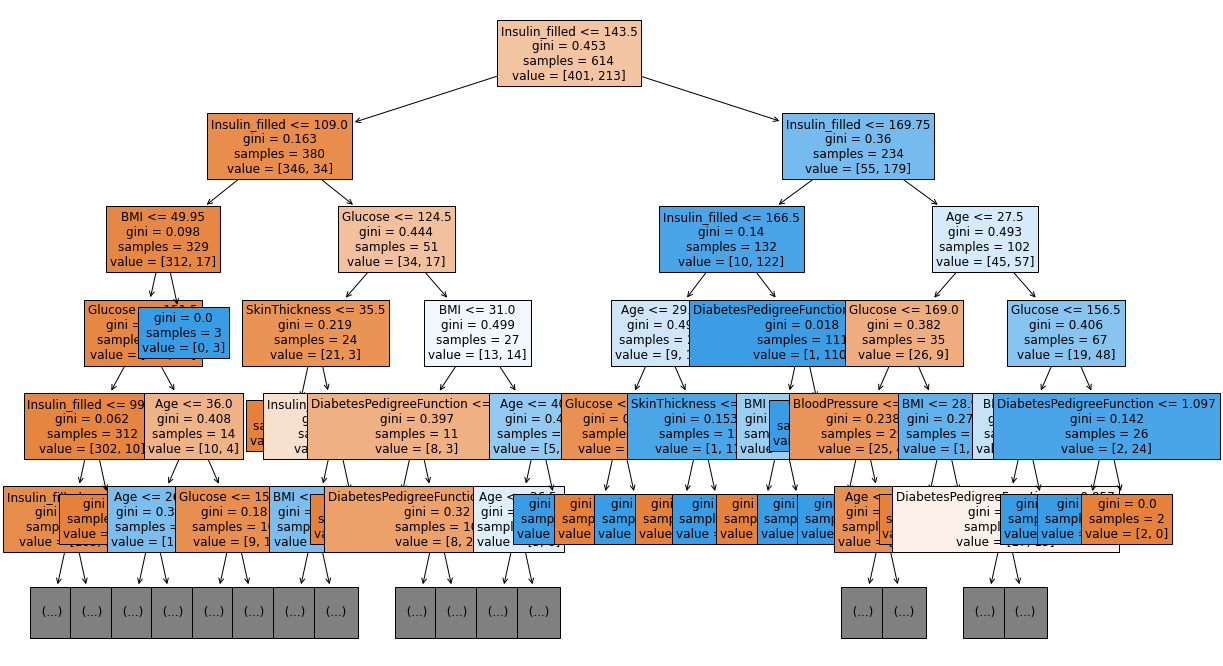

In [31]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,12))
plot_tree(model, filled=True, feature_names=feature_names, max_depth=5, fontsize=12)
plt.show()

In [32]:

model.feature_importances_

array([0.09776889, 0.04081865, 0.0344541 , 0.07695165, 0.04556202,
       0.09481997, 0.        , 0.60962472])

<AxesSubplot:>

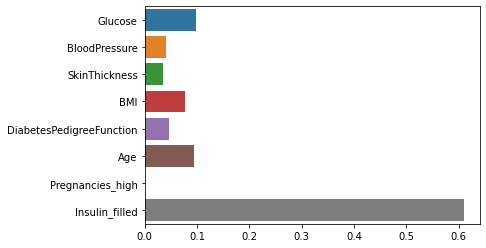

In [33]:
sns.barplot(x=model.feature_importances_, y=feature_names)


In [34]:

(y_test == y_predict).mean() * 100

89.6103896103896

In [35]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.8961038961038961